# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

In [1]:
pip install scikit-learn==0.24.2 pandas==0.24.2

  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\vivek\anaconda3\lib\site-packages\pandas-2.2.2.dist-info\
   from C:\Users\vivek\anaconda3\Lib\site-packages\~andas-2.2.2.dist-info
  Moving to c:\users\vivek\anaconda3\lib\site-packages\pandas.libs\
   from C:\Users\vivek\anaconda3\Lib\site-packages\~andas.libs
  Moving to c:\users\vivek\anaconda3\lib\site-packages\pandas\
   from C:\Users\vivek\anaconda3\Lib\site-packages\~-ndas
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\vivek\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\vivek\\AppData\\Local\\Temp\\pip-install-9pokutw5\\pandas_3a20ea2ba5c44702a3ccc5fd0f300c8f\\setup.py'"'"'; __file__='"'"'C:\\Users\\vivek\\AppData\\Local\\Temp\\pip-install-9pokutw5\\pandas_3a20ea2ba5c44702a3ccc5fd0f300c8f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\vivek\AppData\Local\Temp\pip-wheel-p5e5a_m6'
       cwd: C:\Users\vivek\AppData\Local\Temp\pip-install-9pokutw5\pandas_3a20ea2ba5c44702a3ccc5fd0f300c8f\
  Complete output (841 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.9
  creat

In [2]:
import pandas as pd

  copying pandas\tests\arrays\categorical\conftest.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_algos.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_analytics.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_api.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_constructors.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_dtypes.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_indexing.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_missing.py -> build\lib.win-amd64-3.9\pandas\tests\arrays\categorical
  copying pandas\tests\arrays\categorical\test_operators.py -> buil

In [3]:
data = pd.read_csv('bank-additional.csv', sep=';', header=0)

In [4]:
print(data.head())

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables into numerical format
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on test data: 0.8875404530744336
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1105
           1       0.47      0.55      0.51       131

    accuracy                           0.89      1236
   macro avg       0.71      0.74      0.72      1236
weighted avg       0.90      0.89      0.89      1236



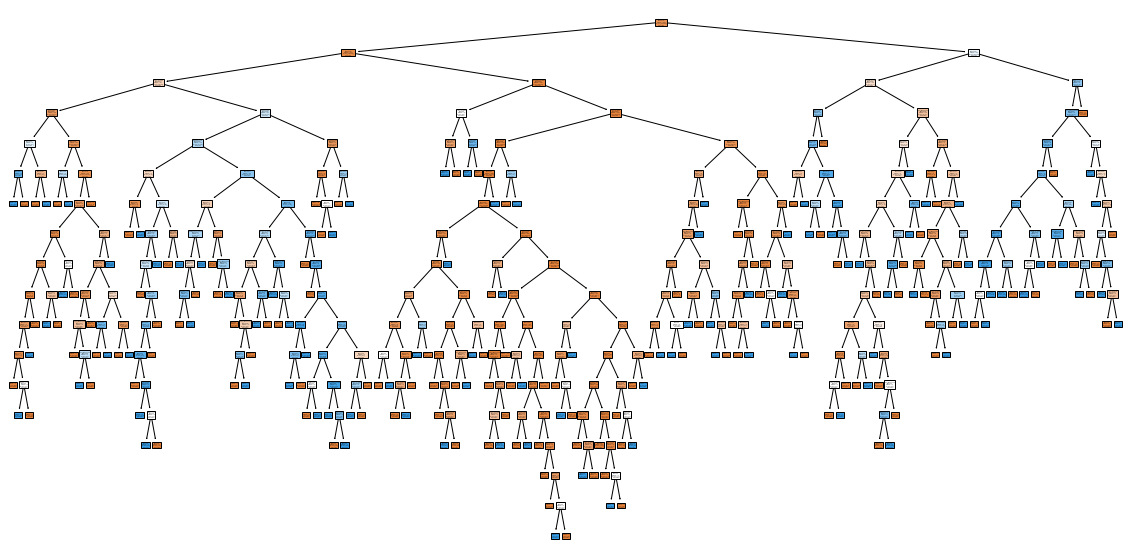

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()
